#Estudio de factores sociales y academicos que permiten identificar el nivel de consumo de alcohol en estudiantes pre-universitarios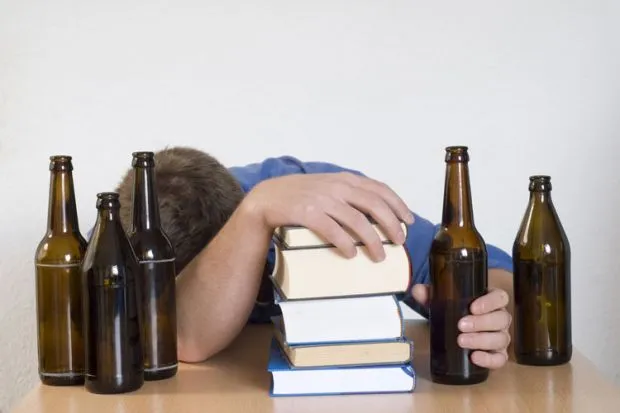

# Introducción:

En este notebook se presentará el tratamiento y análisis de los datos de un conjunto de datos que relacionan el consumo de alcohol de estudiantes con distintos comportamientos y condiciones de estos. El análisis de estos datos nos servirá para aprender a identificar estudiantes con factores de riesgo que pudiesen indicar que el estudiante tiene una mayor tendencia a consumir alcohol.

En todo el mundo, más de una cuarta parte (26.5%) de los jóvenes entre 15-19 años son bebedores, lo que supone 155 millones de adolescentes. Las mayores tasas de consumo actual de alcohol corresponden a Europa (43,8%), la Región de las Américas (38.2%) y el Pacífico Occidental (37,9%). Las encuestas escolares indican que, en muchos países, el consumo de alcohol comienza antes de los 15 años, con diferencias muy pequeñas entre niños y niñas.

# Análisis del dataset

Para realizar este estudio se tomó en cuenta las condiciones y comportamientos, de 649 estudiantes de una clase, buscando patrones en los datos que pudiesen indicar la tendencia que tiene un estudiante a consumir bebidas alcoholicas.

Para poder realizar esta diferenciación de patrones de comportamiento se tendrá en cuenta las variables weekend alcohol consumption (Consumo de alcohol el fin de semana) y workday alcohol consumption (consumo de alcohol en días laborales)(Walc y Dalc en el dataset respectivamente), las cuales toman valores entre 1 y 5, siendo 5 muy alto y 1 muy bajo, en este analisis se decidió sumar ambas variables para tomarlas cómo ground truth, por tanto ahora nuestro ground truth tomará valores entre 2 y 10.

La información del dataset puede encontrarse en el siguiente link:
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption


In [ ]:
from google.colab import files
import pandas as pd
files.upload()
dp = pd.read_csv('student-por.csv')

dp.info()

dp.head()


Saving student-por.csv to student-por.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
## limpiar dataset

import pandas as pd

dp.drop(['school','reason','traveltime', 'failures','paid','nursery'],axis=1, inplace=True)

dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         649 non-null    object
 1   age         649 non-null    int64 
 2   address     649 non-null    object
 3   famsize     649 non-null    object
 4   Pstatus     649 non-null    object
 5   Medu        649 non-null    int64 
 6   Fedu        649 non-null    int64 
 7   Mjob        649 non-null    object
 8   Fjob        649 non-null    object
 9   guardian    649 non-null    object
 10  studytime   649 non-null    int64 
 11  schoolsup   649 non-null    object
 12  famsup      649 non-null    object
 13  activities  649 non-null    object
 14  higher      649 non-null    object
 15  internet    649 non-null    object
 16  romantic    649 non-null    object
 17  famrel      649 non-null    int64 
 18  freetime    649 non-null    int64 
 19  goout       649 non-null    int64 
 20  Dalc      

Tal y como mencionamos anteriormente las columnas que tendremos en cuenta para clasificar estos datos son las que tienen cómo label Walc y Dalc



In [ ]:
dp['sex'].unique()
dp['sex'] = dp['sex'].map(
    {
        'F': 0,
        'M': 1, 
    }
)
dp['address'].unique()
dp['address'] = dp['address'].map(
    {
        'U': 0,
        'R': 1, 
    }
)

dp['famsize'].unique()
dp['famsize'] = dp['famsize'].map(
    {
        'GT3': 0,
        'LE3': 1, 
    }
)

dp['Pstatus'].unique()
dp['Pstatus'] = dp['Pstatus'].map(
    {
        'T': 0,
        'A': 1, 
    }
)

dp['Mjob'].unique()
dp['Mjob'] = dp['Mjob'].map(
    {
        'other': 0,
        'services': 1, 
        'at_home': 2,
        'teacher': 3, 
        'health': 4,
    }
)

dp['Fjob'].unique()
dp['Fjob'] = dp['Fjob'].map(
    {
        'other': 0,
        'services': 1, 
        'at_home': 2,
        'teacher': 3, 
        'health': 4,
    }
)

dp['guardian'].unique()
dp['guardian'] = dp['guardian'].map(
    {
        'mother': 0,
        'father': 1, 
        'other': 2,
    }
)

dp['schoolsup'].unique()
dp['schoolsup'] = dp['schoolsup'].map(
    {
        'no': 0,
        'yes': 1, 
    }
)

dp['famsup'].unique()
dp['famsup'] = dp['famsup'].map(
    {
        'no': 0,
        'yes': 1, 
    }
)

In [ ]:
dp['activities'].unique()
dp['activities'] = dp['activities'].map(
    {
        'no' : 0,
        'yes' : 1,
     
    }
)
dp['higher'].unique()
dp['higher'] = dp['higher'].map(
    {
        'no' : 0,
        'yes' : 1,
     
    }
)
dp['internet'].unique()
dp['internet'] = dp['internet'].map(
    {
        'no' : 0,
        'yes' : 1,
     
    }
)
dp['romantic'].unique()
dp['romantic'] = dp['romantic'].map(
    {
        'no' : 0,
        'yes' : 1,
     
    }
)

In [ ]:
dp[['sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','studytime','schoolsup','famsup','activities','higher','internet','romantic','famrel','freetime','goout','health','absences','G1','G2','G3']].corr()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,...,internet,romantic,famrel,freetime,goout,health,absences,G1,G2,G3
sex,1.000000,-0.043662,-0.025503,0.098205,-0.064700,0.119127,0.083913,0.042369,0.019243,0.019301,...,0.065911,-0.110144,0.083473,0.146305,0.058178,0.139547,0.021336,-0.104109,-0.104005,-0.129077
age,-0.043662,1.000000,0.025848,-0.002470,0.005631,-0.107832,-0.121050,-0.070748,-0.093411,0.171760,...,0.013115,0.178810,-0.020559,-0.004910,0.112805,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
address,-0.025503,0.025848,1.000000,-0.046113,-0.094635,-0.190320,-0.141493,-0.049785,-0.087115,0.026165,...,-0.175794,0.030939,0.033897,0.036647,-0.015475,-0.003787,-0.073653,-0.157127,-0.154600,-0.167637
famsize,0.098205,-0.002470,-0.046113,1.000000,0.239608,-0.014325,-0.039538,0.050420,-0.027689,-0.019892,...,0.013357,-0.032936,0.004641,-0.021257,-0.004312,0.002448,0.004645,0.047230,0.038891,0.045016
Pstatus,-0.064700,0.005631,-0.094635,0.239608,1.000000,0.057174,0.031856,-0.048667,-0.023872,-0.007587,...,-0.059754,0.053828,-0.051303,-0.037585,-0.031086,-0.012638,0.117492,-0.015251,-0.018689,0.000754
Medu,0.119127,-0.107832,-0.190320,-0.014325,0.057174,1.000000,0.647477,0.346054,0.228654,-0.111274,...,0.266052,-0.030992,0.024421,-0.019686,0.009536,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,0.083913,-0.121050,-0.141493,-0.039538,0.031856,0.647477,1.000000,0.251442,0.350929,0.006902,...,0.183483,-0.067675,0.020256,0.006841,0.027690,0.044910,0.029859,0.217501,0.225139,0.211800
Mjob,0.042369,-0.070748,-0.049785,0.050420,-0.048667,0.346054,0.251442,1.000000,0.248971,-0.089782,...,0.074912,-0.014330,-0.018286,0.017420,-0.017875,0.022845,-0.091515,0.093637,0.098022,0.107195
Fjob,0.019243,-0.093411,-0.087115,-0.027689,-0.023872,0.228654,0.350929,0.248971,1.000000,0.018821,...,-0.020289,-0.000735,-0.039795,-0.022236,-0.025089,0.025179,-0.023117,0.072841,0.076978,0.069336
guardian,0.019301,0.171760,0.026165,-0.019892,-0.007587,-0.111274,0.006902,-0.089782,0.018821,1.000000,...,0.028528,0.066583,-0.036994,-0.003350,-0.025124,-0.003584,0.059490,-0.046779,-0.044246,-0.029474


In [ ]:
## A continuación sumaremos los valores de Dalc en Walc y eliminaremos Dalc
# Por tanto ahora Walc será nuestro ground truth y lo tomaremos cómo weekly alcohol comsuption
dp['Walc']=dp['Walc']+dp['Dalc']
dp.drop(['Dalc'],axis=1, inplace=True)

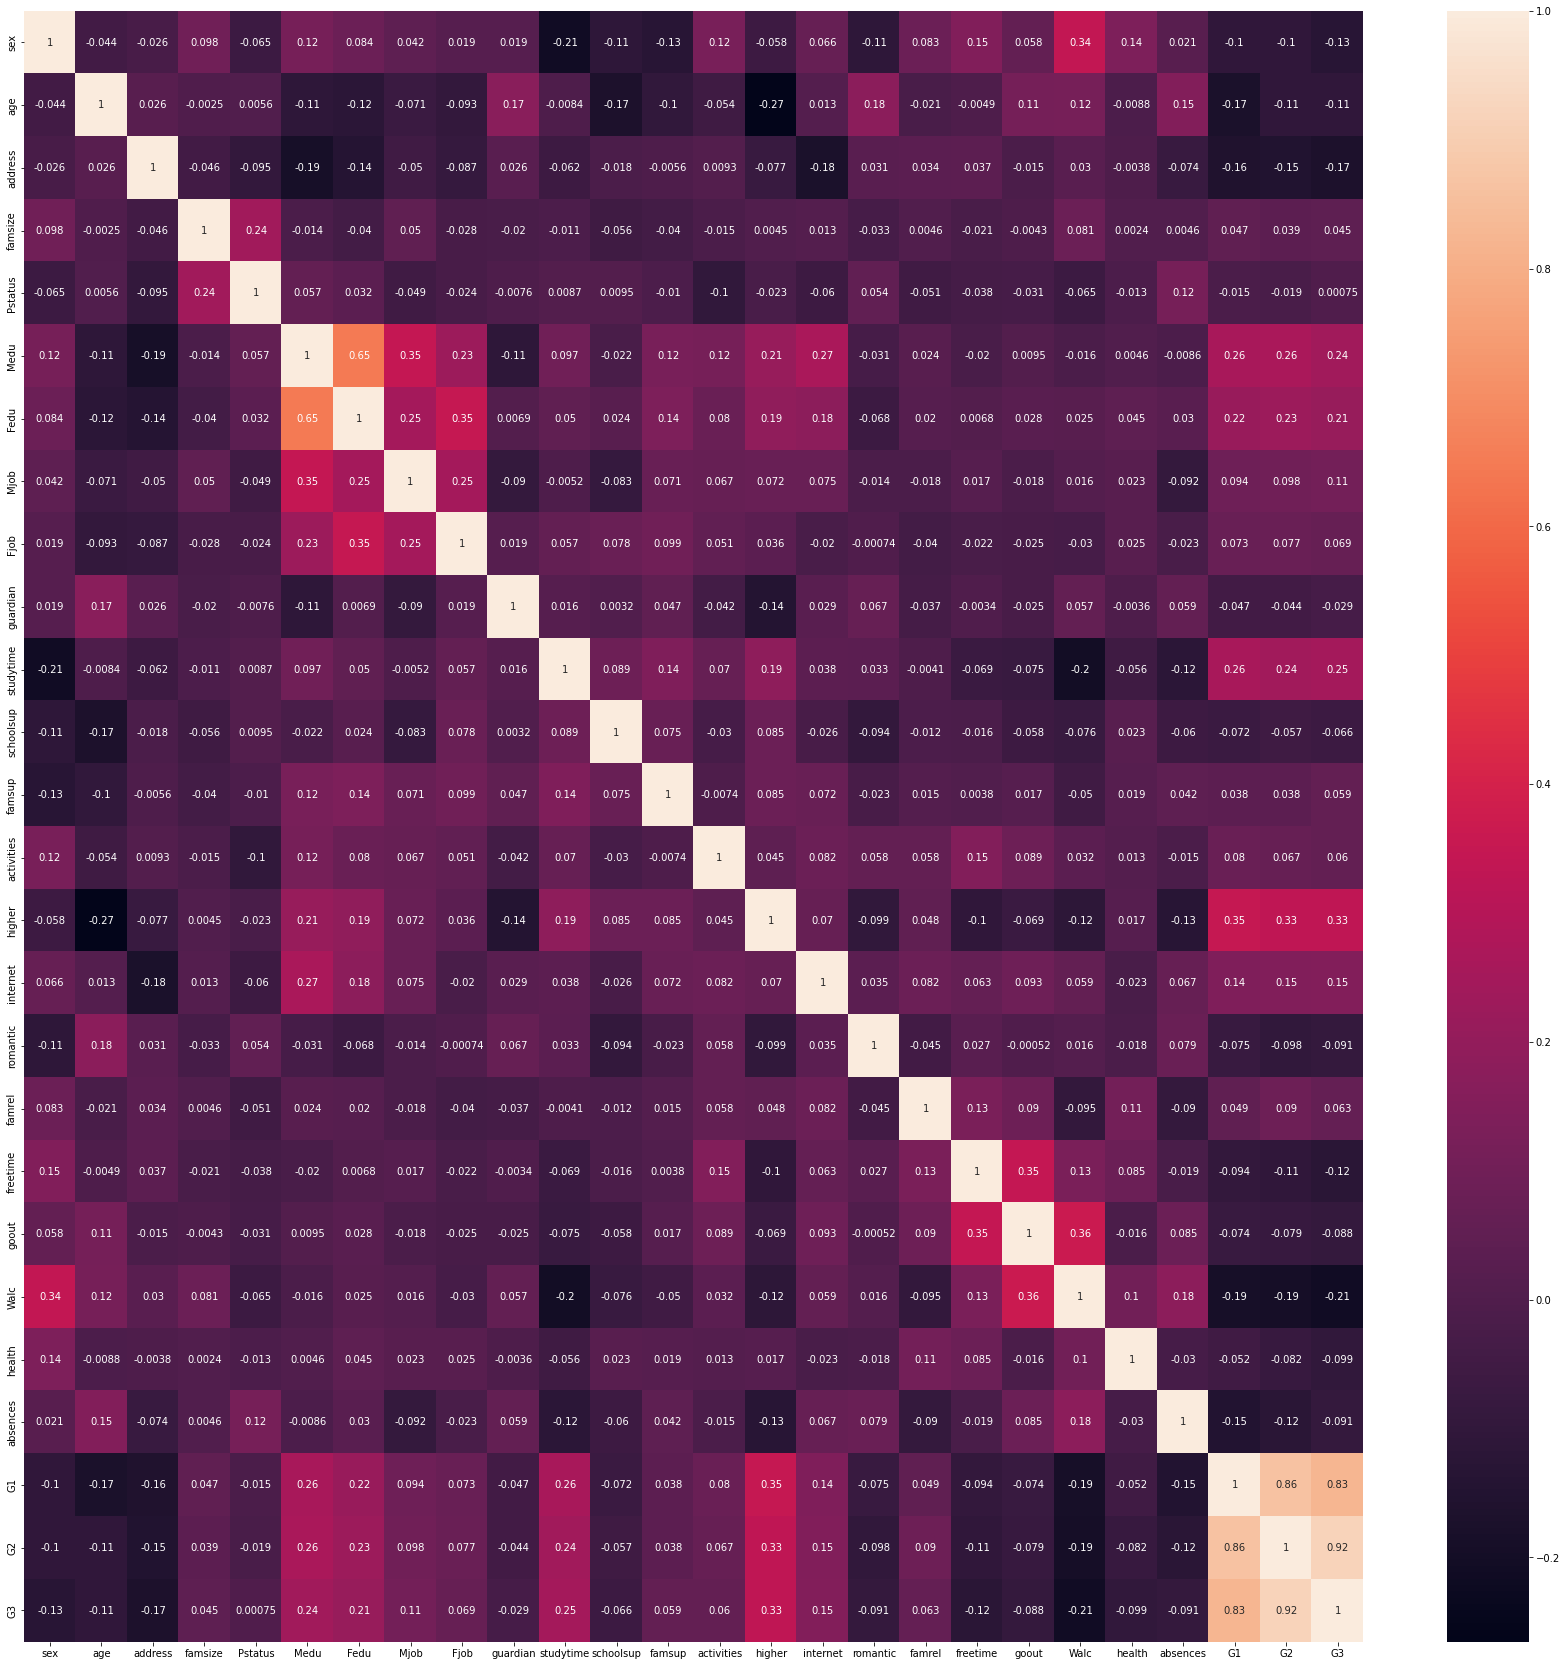

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = dp.corr(method='pearson')

plt.figure(figsize=(30, 30))
sns.heatmap(corr_df, annot=True)
plt.show()

In [ ]:
#import numpy as np
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

X  = dp[['sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','studytime','schoolsup','famsup','activities','higher','internet','romantic','famrel','freetime','goout','health','absences','G1','G2','G3']]
y = dp['Walc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=21)

est = DecisionTreeClassifier(random_state=21)
est.fit(X_train,y_train)
pred = est.predict(X_test)
print('prediction: ',pred)
print('grand trouth: ',y_test.values)
print('accuracy socre: ', accuracy_score(pred, y_test))
print('recall socre: ', recall_score(y_test,pred, average='macro'))
print('f1 socre: ', f1_score(y_test, pred, average='macro'))

features= est.feature_importances_
bestfeat = np.argsort(features[::-1])
bestcols = bestfeat[0:24]
X_train_best = X_train.values[:, bestcols]
X_test_best = X_test.values[:, bestcols]

est = DecisionTreeClassifier(random_state=21, criterion='gini')
est.fit(X_train_best, y_train)
score = est.score(X_test_best, y_test)
pred = est.predict(X_test_best)
print('prediction: ',pred)
print('grand trouth: ',y_test.values)
print('accuracy socre: ', accuracy_score(pred, y_test))
print('recall socre: ', recall_score(y_test,pred, average='macro'))
print('f1 socre: ', f1_score(y_test, pred, average='macro'))


prediction:  [ 6  2  2  8  6  3  3  3  5  4  7  3  3  6  4  2  8  2  2  3  9  2  6  4
  7  5  2  2  2  2  2  3  4  2  3  3  3  7  2  6  2  5 10  6  3  3  8  3
  8  2  3  4  8  2  3  6  2  4  2  3  3  3  2  6  3  2  2  3  2  8  3  3
  4  4  5  4  6  4  2  5  4  3  3  7  4  6  4  6  2  5  4  8  3  2  4  2
  2  2  3  2  6  5  6  4  9  6 10  3  4  4  6  8  2  2  4  6  5  2  6  3
  7  2  3  8  2  4  5  5  8  4  3  5  4  2  2  2  3  2  2  3  2  3  2  5
  9  5  3  6  4  2  2  4  2  3  2  2  8  3  9  2  4  4  5  3  4  2  5  3
  6  3  2  4  3  4  3  6  7  4  5  2  2  2  7  2  2  2  5  4  4  7  2  4
  3  7  4]
test:  [ 3  6  3 10  2  2  2  7  3  4  7  5  4  2  3  2  2  5  2  5  8  2  2  6
  2  2  2  2  4  3  3  3  5  2  2  7  2  5  2  8  4  2  4  7  2  3 10  6
  8  2  2  3  6  2  3  2  2  2  2  4  5  5  5  5  4  2  4  2  3 10  2  3
  3  4  3  3 10  6  5  2  7  4  5  3  4  4  4  2  5  4  6  7  2  3  3  5
  4  4  7  2  4  2  6  2  8  2  4  5  2  5  5  6  5  4  2  4  6  4  2  3
  6  7 10  6  5  5  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import jaccard_score

n= range(100)
X  = dp[['sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','studytime','schoolsup','famsup','activities','higher','internet','romantic','famrel','freetime','goout','health','absences','G1','G2','G3']]
y = dp['Walc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=21)
s1plot= []
s2plot= []
s3plot= []
splot= []
bests1plot= []
bests2plot= []
bests3plot= []
bestsplot= []
for x in n:
  est = RandomForestClassifier(n_estimators=x+1, random_state=21, criterion='gini')
  est.fit(X_train, y_train)
  score = est.score(X_test, y_test)
  pred = est.predict(X_test)
  s1 = jaccard_score(pred, y_test, average='micro')
  s2 = accuracy_score(pred, y_test)
  s3 = balanced_accuracy_score(pred, y_test)  
  s1plot.append(s1)
  s2plot.append(s2)
  s3plot.append(s3)
  splot.append(score)

features= est.feature_importances_
bestfeat = np.argsort(features[::-1])
bestcols = bestfeat[0:24]

X_train_best = X_train.values[:, bestcols]
X_test_best = X_test.values[:, bestcols]



for x in n:
  est = RandomForestClassifier(n_estimators=x+1, random_state=21, criterion='gini')
  est.fit(X_train_best, y_train)
  score = est.score(X_test_best, y_test)
  pred = est.predict(X_test_best)
  s1 = jaccard_score(pred, y_test, average='micro')
  s2 = accuracy_score(pred, y_test)
  s3 = balanced_accuracy_score(pred, y_test)  
  bests1plot.append(s1)
  bests2plot.append(s2)
  bests3plot.append(s3)
  bestsplot.append(score)





/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_clas

<function matplotlib.pyplot.show(*args, **kw)>

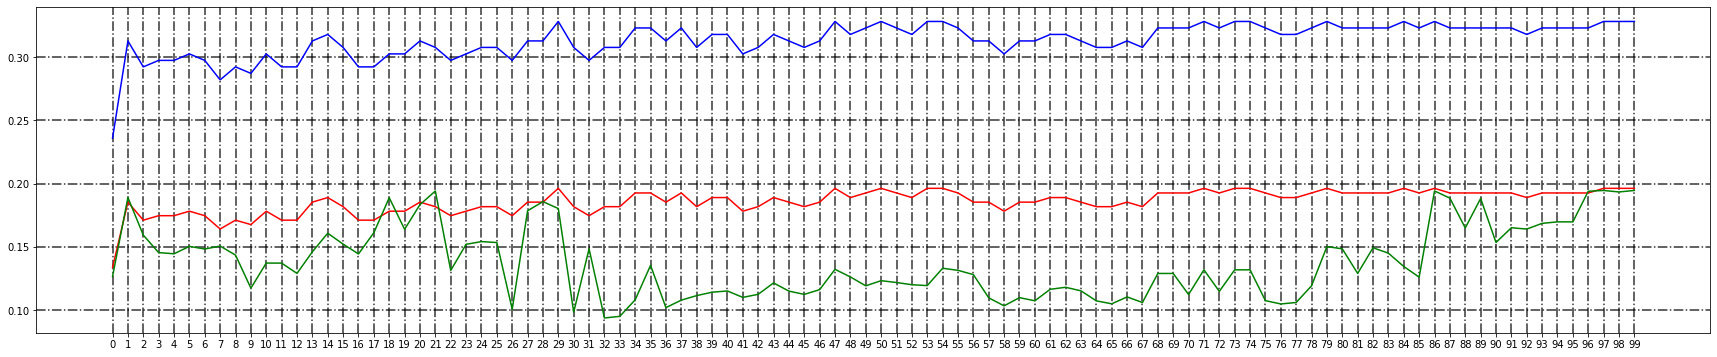

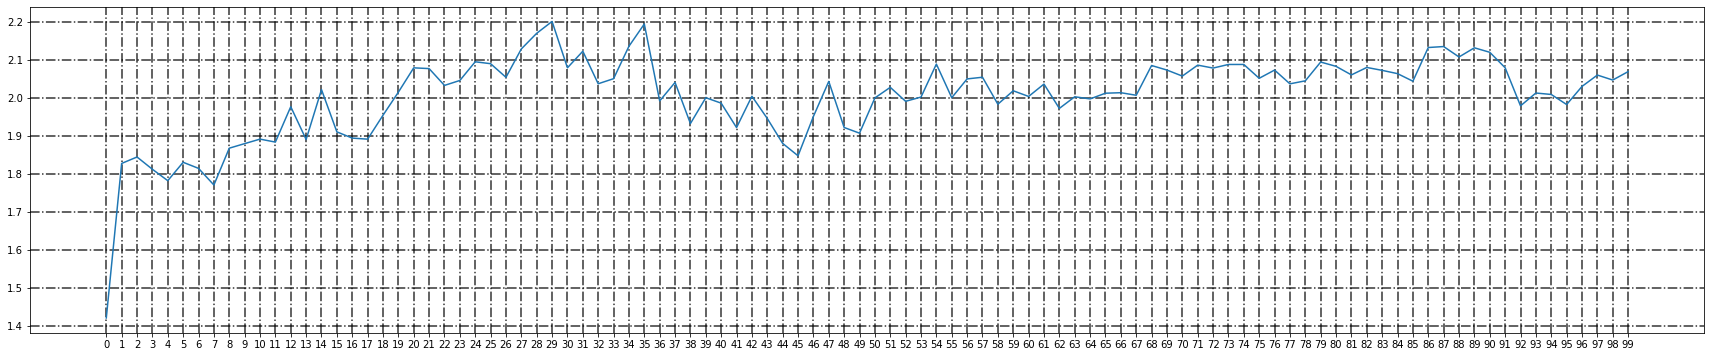

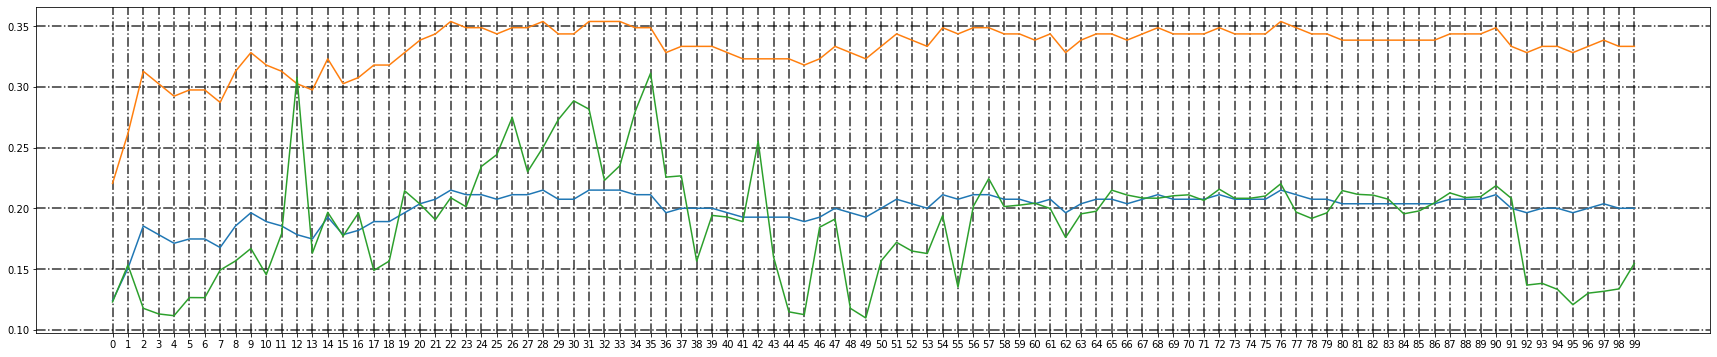

In [ ]:
ax= plt
meanax = plt

ax.figure(figsize=(30,6))
ax.plot(bests1plot, color='red')
ax.plot(bests2plot, color='blue')
ax.plot(bests3plot, color='green')
#ax.plot(bestsplot)
ax.xticks(range(0, 100, 1))
ax.grid(alpha=0.8, color='Black',linestyle='-.',linewidth=1.5)
ax.show

mean=[]

for n in range(100):
  mean.append(bests1plot[n]+bests2plot[n]+bests3plot[n]+bestsplot[n]+s1plot[n]+s2plot[n]+s3plot[n]+splot[n])


meanax.figure(figsize=(30,6))
meanax.plot(mean)
meanax.xticks(range(0, 100, 1))
meanax.grid(alpha=0.8, color='Black',linestyle='-.',linewidth=1.5)
meanax.show

plt.figure(figsize=(30,6))
plt.plot(s1plot)
plt.plot(s2plot)
plt.plot(s3plot)
#plt.plot(splot)
plt.xticks(range(0, 100, 1))
plt.grid(alpha=0.8, color='Black',linestyle='-.',linewidth=1.5)
plt.show




In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import jaccard_score

X  = dp[['sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','studytime','schoolsup','famsup','activities','higher','internet','romantic','famrel','freetime','goout','health','absences','G1','G2','G3']]
y = dp['Walc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=21)

features= est.feature_importances_
bestfeat = np.argsort(features[::-1])
bestcols = bestfeat[0:24]

X_train_best = X_train.values[:, bestcols]
X_test_best = X_test.values[:, bestcols]

est = RandomForestClassifier(n_estimators=30, random_state=21, criterion='gini')
est.fit(X_train_best, y_train)
score = est.score(X_test_best, y_test)
pred = est.predict(X_test_best)
s1 = jaccard_score(pred, y_test, average='micro')
s2 = accuracy_score(pred, y_test)
s3 = balanced_accuracy_score(pred, y_test)  

print('Score = ',score,
      'S1 = ',s1,
      'S2 = ',s2,
      'S3 = ',s3)


est = RandomForestClassifier(n_estimators=36, random_state=21, criterion='gini')
est.fit(X_train_best, y_train)
score = est.score(X_test_best, y_test)
pred = est.predict(X_test_best)
s1 = jaccard_score(pred, y_test, average='micro')
s2 = accuracy_score(pred, y_test)
s3 = balanced_accuracy_score(pred, y_test)  


print('Score = ',score,
      'S1 = ',s1,
      'S2 = ',s2,
      'S3 = ',s3)

est = RandomForestClassifier(n_estimators=100, random_state=21, criterion='gini')
est.fit(X_train_best, y_train)
score = est.score(X_test_best, y_test)
pred = est.predict(X_test_best)
s1 = jaccard_score(pred, y_test, average='micro')
s2 = accuracy_score(pred, y_test)
s3 = balanced_accuracy_score(pred, y_test)  

print('Score = ',score,
      'S1 = ',s1,
      'S2 = ',s2,
      'S3 = ',s3)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Score =  0.29743589743589743 S1 =  0.1746987951807229 S2 =  0.29743589743589743 S3 =  0.13036305649358065
Score =  0.3333333333333333 S1 =  0.2 S2 =  0.3333333333333333 S3 =  0.22226027397260273
Score =  0.3487179487179487 S1 =  0.2111801242236025 S2 =  0.3487179487179487 S3 =  0.14955044955044958


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1987: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.naive_bayes import GaussianNB

X  = dp[['sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','guardian','studytime','schoolsup','famsup','activities','higher','internet','romantic','famrel','freetime','goout','health','absences','G1','G2','G3']]
y = dp['Walc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=21)

est = GaussianNB()
est.fit(X_train,y_train)
pred = est.predict(X_test)
print('prediction: ',pred)
print('grand trouth: ',y_test.values)
print('accuracy socre: ', accuracy_score(pred, y_test))
print('recall socre: ', recall_score(y_test,pred, average='macro'))
print('f1 socre: ', f1_score(y_test, pred, average='macro'))



prediction:  [ 8  2  3  9  2  2  3  2  2  2  9  8  9  3  9  9  8  8  2  9  9  2  8  9
  2  8  8  8  8  8  8  8  8  8  8  8  8  8  8  6  8  8  8  9  3  3  8  9
  9  2  8  8  8  8  9  3  2  8  8  8  8  6  8  8  8  9  8  8  8  8  8  9
  8  9  8  8  9  9  9  3  8  9  8  8  8  8  8  2  8  9  9  9  8  9  8  2
  8  9  8  8  8  2  9  8  8  9  9  9  8  9  9  9  8  8  9  8  9  8  8  3
  7  8  9  9  9  8  9  8  8  8  3  8 10  8  8  8  8  8  8  8  3  9  3  8
  9  9  8  8  8  8  8  8  3  8  8  8  8  2  9  8  8  8  9  3  8  3  8  2
  9  9  3  8  8  8  8  8  8  2  8  8  3  8  9  9  9  9  9  2  8  8  8  3
  8  9  9]
grand trouth:  [ 3  6  3 10  2  2  2  7  3  4  7  5  4  2  3  2  2  5  2  5  8  2  2  6
  2  2  2  2  4  3  3  3  5  2  2  7  2  5  2  8  4  2  4  7  2  3 10  6
  8  2  2  3  6  2  3  2  2  2  2  4  5  5  5  5  4  2  4  2  3 10  2  3
  3  4  3  3 10  6  5  2  7  4  5  3  4  4  4  2  5  4  6  7  2  3  3  5
  4  4  7  2  4  2  6  2  8  2  4  5  2  5  5  6  5  4  2  4  6  4  2  3
  6  7 10  6

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
